# Assignment A

## ResNet18 on TINY IMAGENET
---

1) Data was downloaded, then data in "train" and "val" folder was combined and split into 70% training dataset and 30% test dataset. This new folder was then zipped and uploaded on drive as "tiny-imagenet-200.zip". Data was then directly accessed from this new "tiny-imagenet-200.zip".

2) Used [ResNet18](https://github.com/genigarus/EVA4/blob/master/API/models/resnet.py) model from [my API](https://github.com/genigarus/EVA4/tree/master/API/models)

3) Used data loader with augmentations(horizontal flip, random rotation and random crop), model loading, train, and test code to train model on tiny imagenet

4) Best Test Accuracy = 53.13%, Final Test accuracy = 51.30%, number of epochs = 50. 

[Link to Google Colab Code File](https://colab.research.google.com/drive/1RcS1k9grWjyJukC7_pCzXwvaKaWBhND1)

[Link to API](https://github.com/genigarus/EVA4/tree/master/API)

## Google Drive Connection

In [0]:
from google.colab import drive
from pathlib import Path
drive.mount("/content/drive", force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import sys
base = Path('/content/drive/My Drive/EVA4/API/')
sys.path.append(str(base))

## Merging and splitting of data
---

This is the first step to be performed to create 70-30 split of train-test data.
Then, this data was zipped and stored on drive as "tiny-imagenet-200.zip". This new "tiny-imagenet-200.zip" is being used as data.

In [0]:
# This needs to be executed once
from utility import *

imagenet_root = '/content/drive/My Drive/EVA4/API/data'
merge_split_data(imagenet_root)

## New Tiny Imagenet Data
----

In [0]:
!ls

drive  sample_data


In [0]:
%%time
zip_path = base/'data/tiny-imagenet-200.zip'
!unzip -q "{zip_path}"

CPU times: user 55.5 ms, sys: 8.36 ms, total: 63.8 ms
Wall time: 24.4 s


In [0]:
!ls

drive  sample_data  tiny-imagenet-200


### Change working directory to where python files are located

In [0]:
import os
default_path = '/content/drive/My Drive/EVA4/API/'
os.chdir(default_path)
print("Current working directory: "+os.getcwd())

Current working directory: /content/drive/My Drive/EVA4/API


In [0]:
# google drive path for saving models, graphs and images
PATH = "../Session12/AssignmentA"
DATA_PATH = "../../../../tiny-imagenet-200"

In [0]:
# Import
from network_pipeline import *

  pip install torch-lr-finder -v --global-option="amp"


In [0]:
cuda = torch.cuda.is_available()

mean, std = find_custom_dataset_mean_std(DATA_PATH, cuda)
print("******Tiny Imagenet Dataset********")
print(f"mean: {mean}")
print(f"std: {std}")

******Tiny Imagenet Dataset********
mean: (0.48071703, 0.4485903, 0.39811203)
std: (0.07914779, 0.07689525, 0.080644414)


# Creating and Executing Pipeline for loading data, creating and training model and hyperparameter tuning

In [0]:
# Initialize Variables
seed = 1
imagenet_mean, imagenet_std = (0.4807, 0.4486, 0.3981), (0.0791, 0.0769, 0.0806)
need_albumentation = False
batch_size = 256
num_classes = 200
labels_list = class_to_label_mapping(DATA_PATH)
inp_size = (3, 64, 64)
path = PATH+"/model"
model_file_name = "tiny_imagenet_resnet_model"

model_name, criterion, optimizer_name = "ResNet18", nn.CrossEntropyLoss(), "SGD"#, "OneCycleLR"
init_lr, init_weight_decay, end_lr, num_epochs =  1e-10, 1e-2, 1, 500

# Create Network Pipeline
network = NetworkPipeline(DATA_PATH+"/train_set", inp_size, seed, imagenet_mean, imagenet_std, need_albumentation, batch_size, labels_list, model_name, criterion, optimizer_name, num_classes=num_classes, train_loader=None, test_loader=None, is_custom=True, test_data_path=DATA_PATH+"/test_set")#, scheduler_name)



 Generating train and test loaders.....


Sample Dataset after transformation


computer keyboard,etc jellyfish confectionery,etc walking stick,etc chest


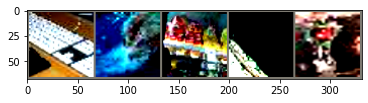

In [0]:
# Display sample data
print("Sample Dataset after transformation")
show_sample_images(network.train_loader, network.labels_list)

  0%|          | 0/301 [00:00<?, ?it/s]

Creating model...

 Model Summary:
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]           1,728
       BatchNorm2d-2           [-1, 64, 64, 64]             128
            Conv2d-3           [-1, 64, 64, 64]          36,864
       BatchNorm2d-4           [-1, 64, 64, 64]             128
            Conv2d-5           [-1, 64, 64, 64]          36,864
       BatchNorm2d-6           [-1, 64, 64, 64]             128
        BasicBlock-7           [-1, 64, 64, 64]               0
            Conv2d-8           [-1, 64, 64, 64]          36,864
       BatchNorm2d-9           [-1, 64, 64, 64]             128
           Conv2d-10           [-1, 64, 64, 64]          36,864
      BatchNorm2d-11           [-1, 64, 64, 64]             128
       BasicBlock-12           [-1, 64, 64, 64]               0
           Conv2d-13          [-1, 128, 32, 32]          73,728
    

Loss=4.523801326751709 Batch_id=300 Accuracy=5.38: 100%|██████████| 301/301 [05:50<00:00,  1.17s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0176, Accuracy: 2486/33000 (7.53%)

EPOCH: 2


Loss=4.084901809692383 Batch_id=300 Accuracy=11.82: 100%|██████████| 301/301 [05:57<00:00,  1.19s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0155, Accuracy: 4584/33000 (13.89%)

EPOCH: 3


Loss=3.83236026763916 Batch_id=300 Accuracy=16.29: 100%|██████████| 301/301 [05:57<00:00,  1.19s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0145, Accuracy: 5929/33000 (17.97%)

EPOCH: 4


Loss=3.7116384506225586 Batch_id=300 Accuracy=19.77: 100%|██████████| 301/301 [05:58<00:00,  1.19s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0143, Accuracy: 6754/33000 (20.47%)

EPOCH: 5


Loss=3.6141185760498047 Batch_id=300 Accuracy=23.08: 100%|██████████| 301/301 [05:58<00:00,  1.19s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0130, Accuracy: 8083/33000 (24.49%)

EPOCH: 6


Loss=3.2923595905303955 Batch_id=300 Accuracy=25.62: 100%|██████████| 301/301 [05:58<00:00,  1.19s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0131, Accuracy: 8422/33000 (25.52%)

EPOCH: 7


Loss=3.230994462966919 Batch_id=300 Accuracy=28.05: 100%|██████████| 301/301 [05:58<00:00,  1.19s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0118, Accuracy: 9904/33000 (30.01%)

EPOCH: 8


Loss=2.936898708343506 Batch_id=300 Accuracy=29.83: 100%|██████████| 301/301 [05:58<00:00,  1.19s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0111, Accuracy: 11099/33000 (33.63%)

EPOCH: 9


Loss=2.861778497695923 Batch_id=300 Accuracy=31.66: 100%|██████████| 301/301 [05:58<00:00,  1.19s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0116, Accuracy: 10381/33000 (31.46%)

EPOCH: 10


Loss=2.9275290966033936 Batch_id=300 Accuracy=33.33: 100%|██████████| 301/301 [05:58<00:00,  1.19s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0110, Accuracy: 11357/33000 (34.42%)

EPOCH: 11


Loss=2.702274799346924 Batch_id=300 Accuracy=34.92: 100%|██████████| 301/301 [05:58<00:00,  1.19s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0110, Accuracy: 11242/33000 (34.07%)

EPOCH: 12


Loss=2.7854294776916504 Batch_id=300 Accuracy=35.66: 100%|██████████| 301/301 [05:58<00:00,  1.19s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0104, Accuracy: 12319/33000 (37.33%)

EPOCH: 13


Loss=2.511482000350952 Batch_id=300 Accuracy=37.32: 100%|██████████| 301/301 [05:58<00:00,  1.19s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0101, Accuracy: 12638/33000 (38.30%)

EPOCH: 14


Loss=2.7357795238494873 Batch_id=300 Accuracy=38.23: 100%|██████████| 301/301 [05:58<00:00,  1.19s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0100, Accuracy: 12965/33000 (39.29%)

EPOCH: 15


Loss=2.6678500175476074 Batch_id=300 Accuracy=39.36: 100%|██████████| 301/301 [05:58<00:00,  1.19s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0097, Accuracy: 13483/33000 (40.86%)

EPOCH: 16


Loss=2.774137496948242 Batch_id=300 Accuracy=40.19: 100%|██████████| 301/301 [05:58<00:00,  1.19s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0093, Accuracy: 14170/33000 (42.94%)

EPOCH: 17


Loss=2.632469892501831 Batch_id=300 Accuracy=41.31: 100%|██████████| 301/301 [05:58<00:00,  1.19s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0096, Accuracy: 13823/33000 (41.89%)

EPOCH: 18


Loss=2.492396593093872 Batch_id=300 Accuracy=41.98: 100%|██████████| 301/301 [05:58<00:00,  1.19s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0093, Accuracy: 14391/33000 (43.61%)

EPOCH: 19


Loss=2.296205997467041 Batch_id=300 Accuracy=43.08: 100%|██████████| 301/301 [05:58<00:00,  1.19s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0096, Accuracy: 13740/33000 (41.64%)

EPOCH: 20


Loss=2.4387736320495605 Batch_id=300 Accuracy=43.95: 100%|██████████| 301/301 [05:58<00:00,  1.19s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0094, Accuracy: 14131/33000 (42.82%)

EPOCH: 21


Loss=2.510958433151245 Batch_id=300 Accuracy=44.62: 100%|██████████| 301/301 [05:58<00:00,  1.19s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0091, Accuracy: 14552/33000 (44.10%)

EPOCH: 22


Loss=2.50152325630188 Batch_id=300 Accuracy=45.18: 100%|██████████| 301/301 [05:58<00:00,  1.19s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0089, Accuracy: 15027/33000 (45.54%)

EPOCH: 23


Loss=2.176257371902466 Batch_id=300 Accuracy=46.18: 100%|██████████| 301/301 [05:59<00:00,  1.19s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0088, Accuracy: 15191/33000 (46.03%)

EPOCH: 24


Loss=2.360835313796997 Batch_id=300 Accuracy=46.88: 100%|██████████| 301/301 [05:58<00:00,  1.19s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0091, Accuracy: 14681/33000 (44.49%)

EPOCH: 25


Loss=2.251286268234253 Batch_id=300 Accuracy=47.82: 100%|██████████| 301/301 [05:58<00:00,  1.19s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0090, Accuracy: 14783/33000 (44.80%)

EPOCH: 26


Loss=2.2302231788635254 Batch_id=300 Accuracy=48.01: 100%|██████████| 301/301 [05:58<00:00,  1.19s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0084, Accuracy: 15609/33000 (47.30%)

EPOCH: 27


Loss=2.0824790000915527 Batch_id=300 Accuracy=48.58: 100%|██████████| 301/301 [05:57<00:00,  1.19s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0089, Accuracy: 15143/33000 (45.89%)

EPOCH: 28


Loss=2.1380488872528076 Batch_id=300 Accuracy=49.44: 100%|██████████| 301/301 [05:58<00:00,  1.19s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0086, Accuracy: 15516/33000 (47.02%)

EPOCH: 29


Loss=2.285900592803955 Batch_id=300 Accuracy=50.02: 100%|██████████| 301/301 [05:58<00:00,  1.19s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0088, Accuracy: 15480/33000 (46.91%)

EPOCH: 30


Loss=2.1370320320129395 Batch_id=300 Accuracy=50.43: 100%|██████████| 301/301 [05:58<00:00,  1.19s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0086, Accuracy: 15473/33000 (46.89%)

EPOCH: 31


Loss=2.045257806777954 Batch_id=300 Accuracy=51.28: 100%|██████████| 301/301 [05:58<00:00,  1.19s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0085, Accuracy: 15752/33000 (47.73%)

EPOCH: 32


Loss=2.0827744007110596 Batch_id=300 Accuracy=51.74: 100%|██████████| 301/301 [05:58<00:00,  1.19s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0084, Accuracy: 16011/33000 (48.52%)

EPOCH: 33


Loss=2.056675672531128 Batch_id=300 Accuracy=52.22: 100%|██████████| 301/301 [05:58<00:00,  1.19s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0082, Accuracy: 16502/33000 (50.01%)

EPOCH: 34


Loss=1.9746718406677246 Batch_id=300 Accuracy=53.16: 100%|██████████| 301/301 [05:58<00:00,  1.19s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0083, Accuracy: 16318/33000 (49.45%)

EPOCH: 35


Loss=1.8776657581329346 Batch_id=300 Accuracy=53.47: 100%|██████████| 301/301 [05:58<00:00,  1.19s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0080, Accuracy: 16748/33000 (50.75%)

EPOCH: 36


Loss=2.0555362701416016 Batch_id=300 Accuracy=53.97: 100%|██████████| 301/301 [05:58<00:00,  1.19s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0079, Accuracy: 16811/33000 (50.94%)

EPOCH: 37


Loss=2.178197145462036 Batch_id=300 Accuracy=54.54: 100%|██████████| 301/301 [05:58<00:00,  1.19s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0081, Accuracy: 16501/33000 (50.00%)

EPOCH: 38


Loss=1.7421743869781494 Batch_id=300 Accuracy=55.38: 100%|██████████| 301/301 [05:58<00:00,  1.19s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0082, Accuracy: 16387/33000 (49.66%)

EPOCH: 39


Loss=1.7522799968719482 Batch_id=300 Accuracy=55.55: 100%|██████████| 301/301 [05:58<00:00,  1.19s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0082, Accuracy: 16433/33000 (49.80%)

EPOCH: 40


Loss=1.792113184928894 Batch_id=300 Accuracy=56.00: 100%|██████████| 301/301 [05:58<00:00,  1.19s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0081, Accuracy: 16513/33000 (50.04%)

EPOCH: 41


Loss=1.8620480298995972 Batch_id=300 Accuracy=56.84: 100%|██████████| 301/301 [05:58<00:00,  1.19s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0082, Accuracy: 16293/33000 (49.37%)

EPOCH: 42


Loss=1.7618979215621948 Batch_id=300 Accuracy=56.99: 100%|██████████| 301/301 [05:58<00:00,  1.19s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0080, Accuracy: 16822/33000 (50.98%)

EPOCH: 43


Loss=1.839908480644226 Batch_id=300 Accuracy=57.56: 100%|██████████| 301/301 [05:58<00:00,  1.19s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0081, Accuracy: 16670/33000 (50.52%)

EPOCH: 44


Loss=1.7017297744750977 Batch_id=300 Accuracy=58.12: 100%|██████████| 301/301 [05:58<00:00,  1.19s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0082, Accuracy: 16683/33000 (50.55%)

EPOCH: 45


Loss=1.6172469854354858 Batch_id=300 Accuracy=58.49: 100%|██████████| 301/301 [05:58<00:00,  1.19s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0078, Accuracy: 17251/33000 (52.28%)

EPOCH: 46


Loss=1.82674241065979 Batch_id=300 Accuracy=59.07: 100%|██████████| 301/301 [05:58<00:00,  1.19s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0082, Accuracy: 16748/33000 (50.75%)

EPOCH: 47


Loss=2.059173822402954 Batch_id=300 Accuracy=59.36: 100%|██████████| 301/301 [05:58<00:00,  1.19s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0076, Accuracy: 17534/33000 (53.13%)

EPOCH: 48


Loss=1.7753759622573853 Batch_id=300 Accuracy=59.84: 100%|██████████| 301/301 [05:58<00:00,  1.19s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0080, Accuracy: 16963/33000 (51.40%)

EPOCH: 49


Loss=1.685721755027771 Batch_id=300 Accuracy=60.55: 100%|██████████| 301/301 [05:58<00:00,  1.19s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0076, Accuracy: 17478/33000 (52.96%)

EPOCH: 50


Loss=1.676180362701416 Batch_id=300 Accuracy=60.82: 100%|██████████| 301/301 [05:58<00:00,  1.19s/it]



Test set: Average loss: 0.0082, Accuracy: 16930/33000 (51.30%)


 Model training completed...

 Saving trained model and parameters...

 Visualizing:


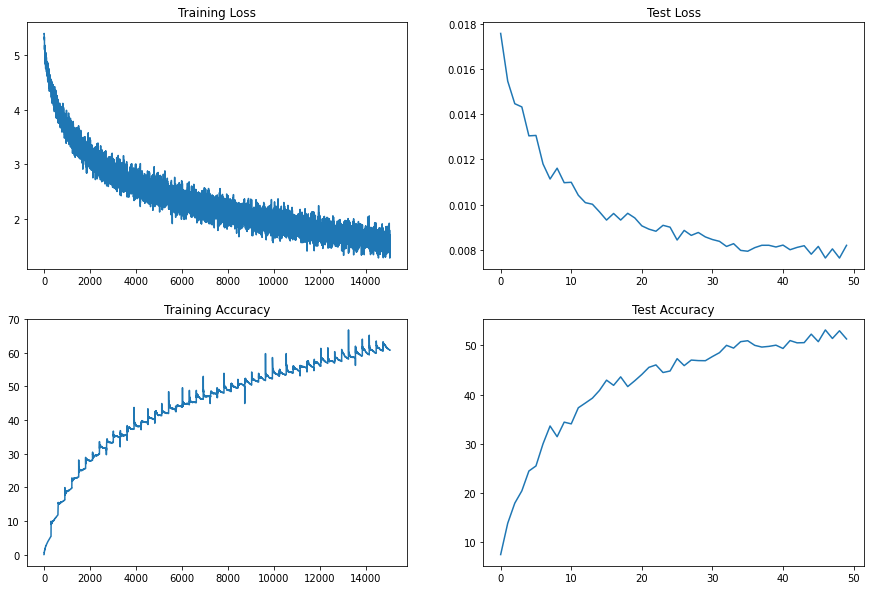

In [0]:
# Intialize variables for creating and training model
MOMENTUM=0.9
WEIGHT_DECAY=5e-4
LR = 0.01
EPOCHS = 50
NUM_OF_BATCHES = network.num_of_batches

# Initialize optimizer and scheduler parameters
optim_params = {"lr": LR, "momentum": MOMENTUM, "weight_decay": WEIGHT_DECAY}

# Build model with specified optimizer and scheduler
network.build_network(optim_params)

# Train model
network.train_network(EPOCHS)

# Save model and parameters
network.save_network(path, model_file_name)

# Visualize training and test accuracy and loss
print("\n Visualizing:")
visualize_graph(network.train_losses, network.train_acc, network.test_losses, network.test_acc)

# Visualize Training Vs Test Accuracy of Trained Model

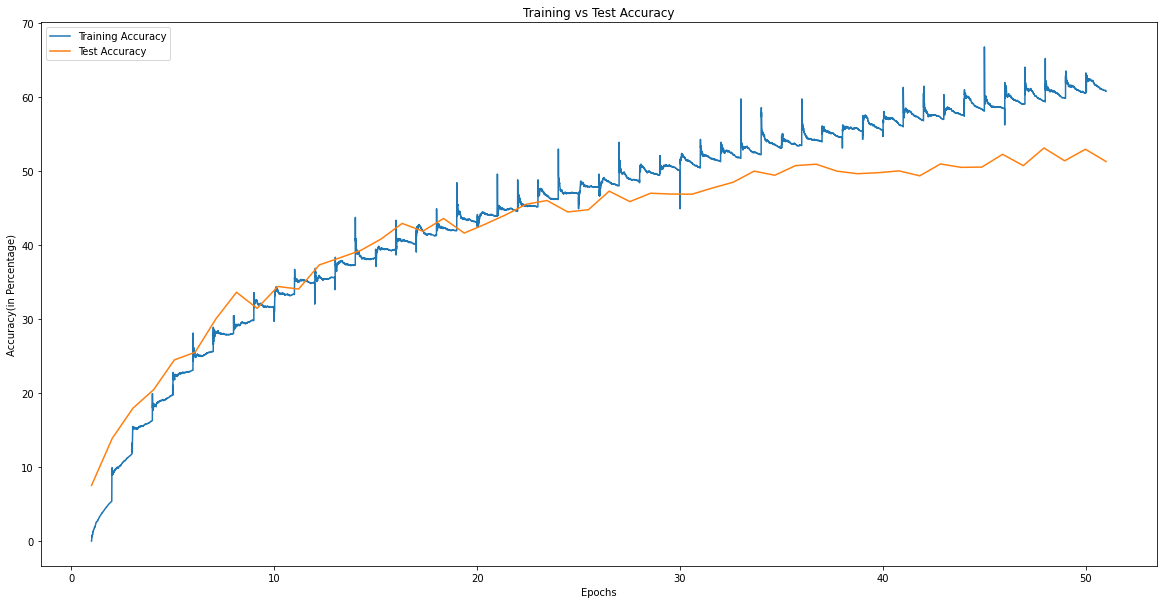

In [0]:
dict_list = {'Training Accuracy': network.train_acc, 'Test Accuracy': network.test_acc}
title = "Training vs Test Accuracy"
xlabel = "Epochs"
ylabel = "Accuracy(in Percentage)"
name = "train_vs_test_acc_comparison_graph"

visualize_save_train_vs_test_graph(EPOCHS, dict_list, title, xlabel, ylabel, PATH+"/visualization", name=name)

# View Correctly Classified Images
---

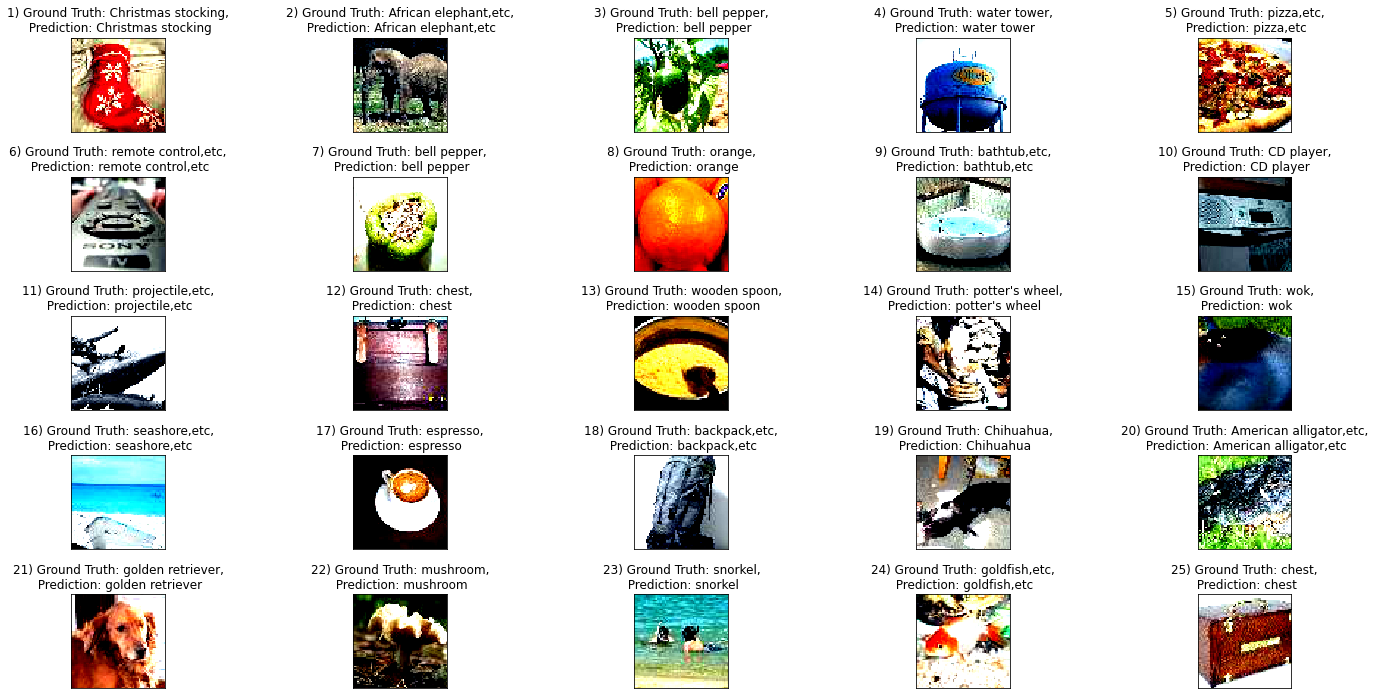

In [0]:
show_save_correctly_classified_images(network.model, network.test_loader, network.device, PATH, name="correctly_classified_imgs", max_correctly_classified_images_imgs=25, is_cifar10 = False, labels_list=network.labels_list)

# View Incorrectly Classified Images
---

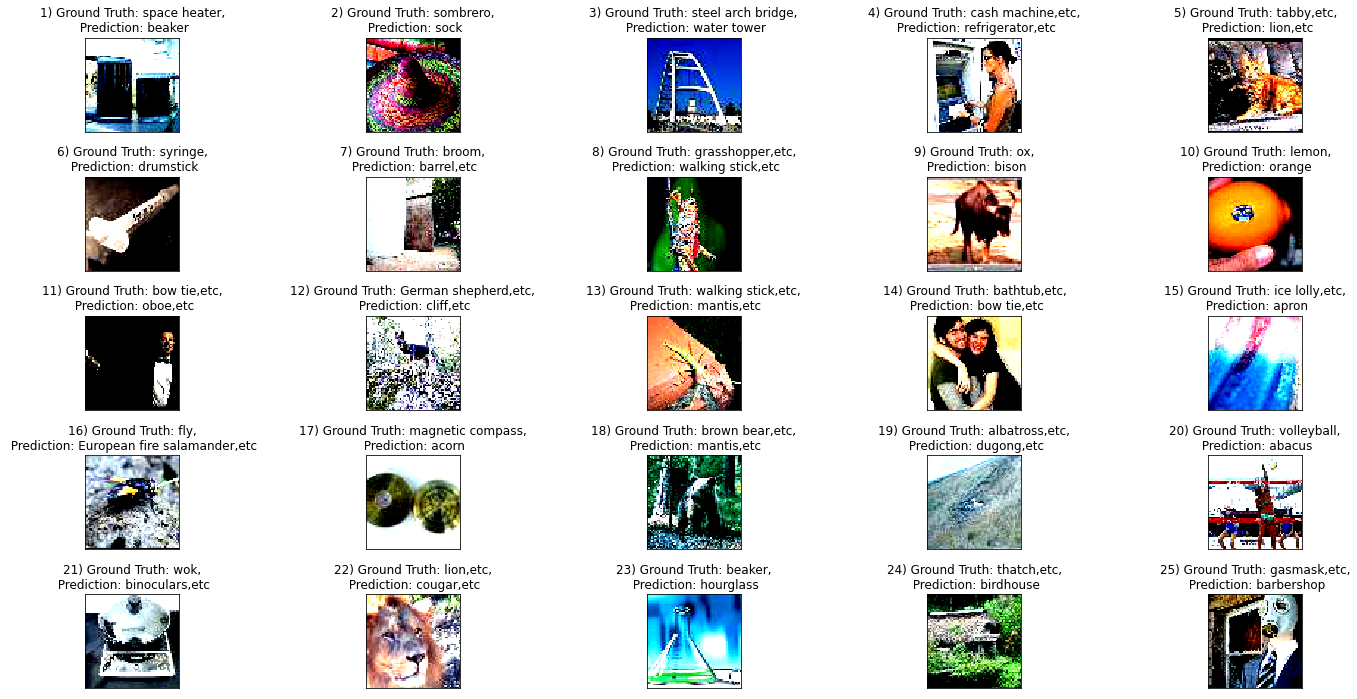

In [0]:
show_save_misclassified_images(network.model, network.test_loader, network.device, PATH, name="misclassified_imgs", max_misclassified_imgs=25, is_cifar10 = False, labels_list=network.labels_list)

# GradCAM Visualization
---

### Fetching correctly and incorrectly classified images

In [0]:
misclassified_imgs, correctly_classified_images = classify_images(network.model, network.test_loader, network.device, 25)

In [0]:
target_layers = ["layer1","layer2","layer3","layer4"]
viz_cam = VisualizeCam(network.model, network.labels_list, target_layers)

## For correctly classified images:-

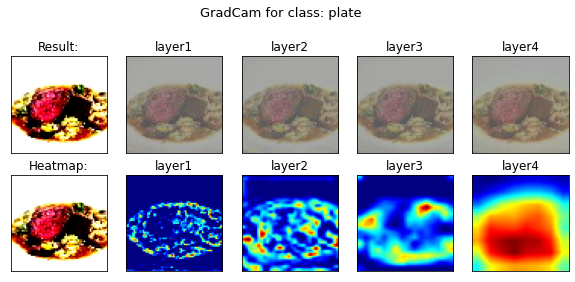

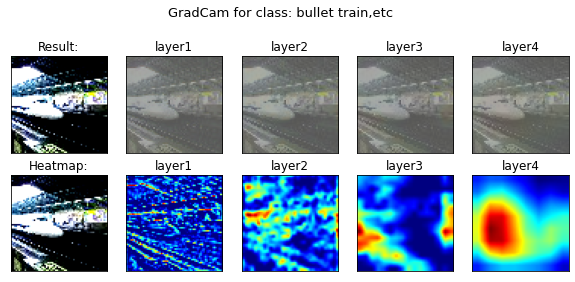

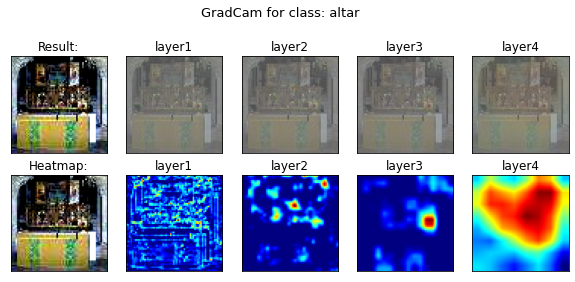

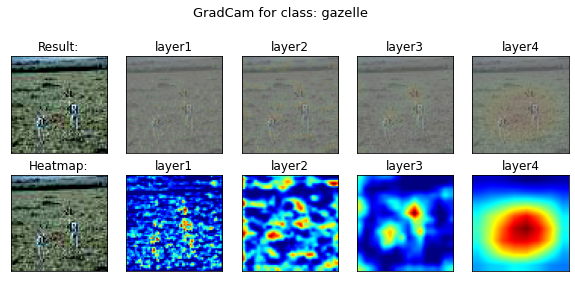

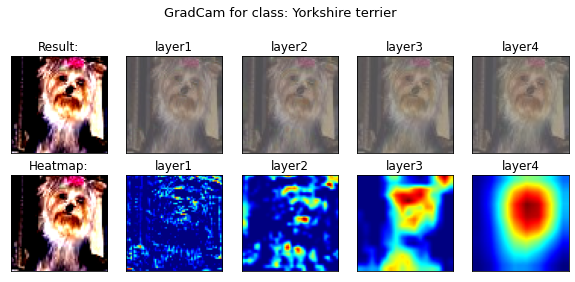

In [0]:
correct_pred_imgs = []
for i in range(len(correctly_classified_images)):
  correct_pred_imgs.append(torch.as_tensor(correctly_classified_images[i]["img"]))
viz_cam(torch.stack(correct_pred_imgs), target_layers, PATH+"/visualization", metric="correct")

## For misclassified images:-

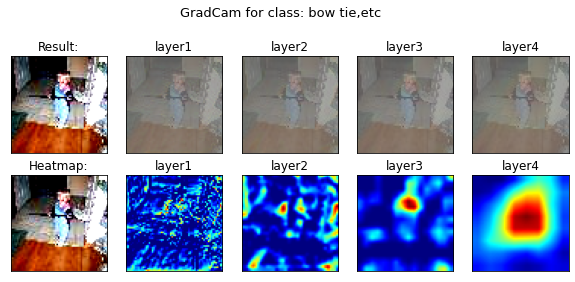

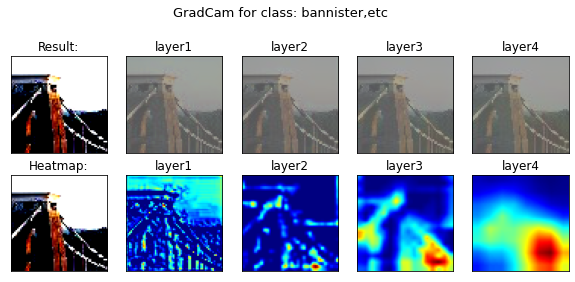

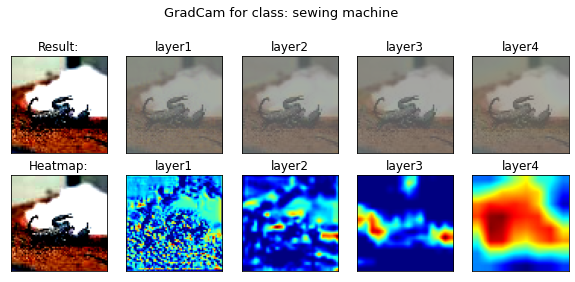

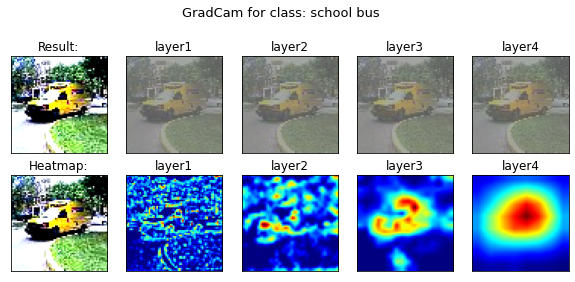

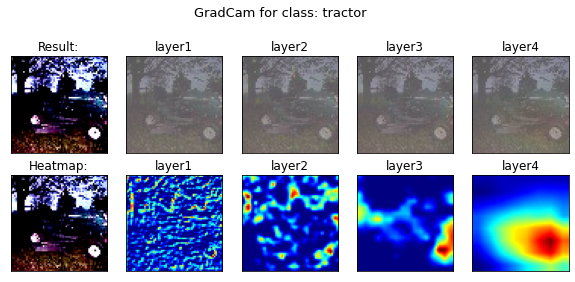

In [0]:
misclassified_pred_images = []
for i in range(len(misclassified_imgs)):
  misclassified_pred_images.append(torch.as_tensor(misclassified_imgs[i]["img"]))
viz_cam(torch.stack(misclassified_pred_images), target_layers, PATH+"/visualization", metric="incorrect")

# Grad-CAM for 25 misclassified images

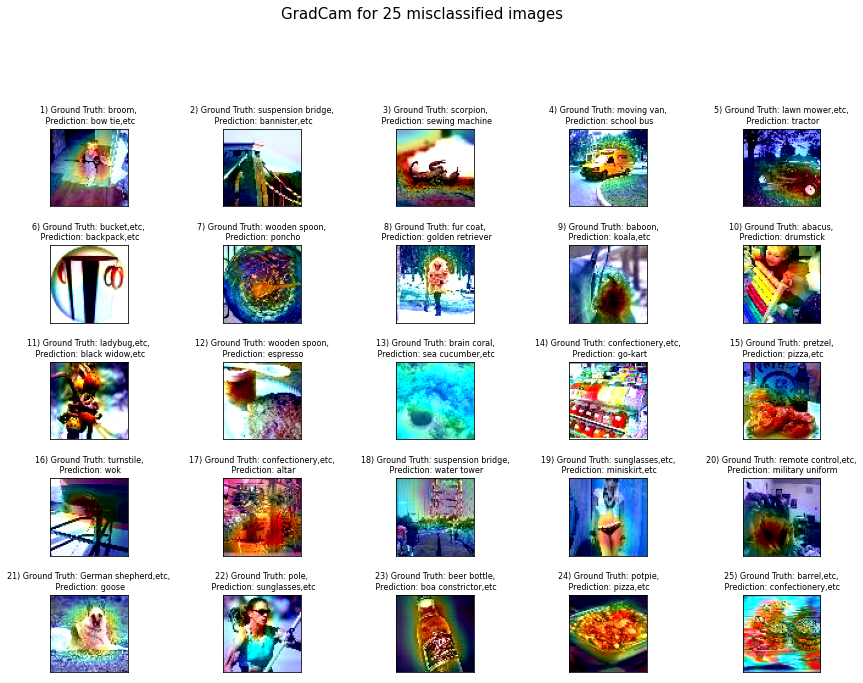

In [0]:
viz_cam.plot_img_heatmap(misclassified_imgs, target_layers, PATH+"/visualization", target_inds=None, metric="", name="gradcam_misclassified_images")